## Assignment 1
* Perform a basic statistical analysis of the time DOT 311 (table is called dot_311) complaints are open (subtract closed date from created date)
* Connect to the database to get the data and do the analysis. Submit the code through Github and type up your results in your PR

Host: training.c1erymiua9dx.us-east-1.rds.amazonaws.com

Port: 5432

Database: training

Username: dot_student

Password: qgis

In [75]:
import pg8000
import pandas as pd

In [76]:
conn = pg8000.connect(host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com',port=5432,database='training',user='dot_student',password='qgis')

In [77]:
conn.rollback()

In [71]:
cursor = conn.cursor()
statement="SELECT * from INFORMATION_SCHEMA.COLUMNs where table_name='dot_311'"
cursor.execute(statement)
columns=[]
for row in cursor.fetchall():
    columns.append(row[3])
print(columns)

['gid', 'unique_key', 'agency', 'agency nam', 'complaint', 'descriptor', 'location t', 'incident z', 'incident a', 'street nam', 'cross stre', 'cross st_1', 'intersecti', 'intersec_1', 'address ty', 'city', 'landmark', 'facility t', 'status', 'due date', 'resolution', 'resoluti_1', 'community', 'borough', 'x coordina', 'y coordina', 'park facil', 'park borou', 'school nam', 'school num', 'school reg', 'school cod', 'school pho', 'school add', 'school cit', 'school sta', 'school zip', 'school not', 'school or', 'vehicle ty', 'taxi compa', 'taxi pick', 'bridge hig', 'bridge h_1', 'road ramp', 'bridge h_2', 'garage lot', 'ferry dire', 'ferry term', 'latitude', 'longitude', 'location', 'geom', 'created_date', 'closed_date']


In [95]:
cursor = conn.cursor()
cursor.execute("SELECT unique_key,agency,complaint,descriptor,created_date,closed_date,borough from dot_311")
complaints=[]
for item in cursor:
    complaints.append(item)

In [145]:
df = pd.DataFrame(complaints)
df.columns = ["unique_key","agency","complaint","descriptor","created_date","closed_date","borough"]

In [146]:
df['efficiency']=df['closed_date']-df['created_date']

In [99]:
df

,unique_key,agency,complaint,descriptor,created_date,closed_date,borough,efficiency
0,32570549,DOT,Traffic Signal Condition,Controller,2016-02-01 00:12:00,2016-02-01 01:15:00,STATEN ISLAND,0 days 01:03:00
1,32572958,DOT,Traffic Signal Condition,Controller,2016-02-01 00:14:00,2016-02-01 00:54:00,STATEN ISLAND,0 days 00:40:00
2,32573576,DOT,Traffic Signal Condition,Controller,2016-02-01 00:15:00,2016-02-01 01:30:00,STATEN ISLAND,0 days 01:15:00
3,32572389,DOT,Traffic Signal Condition,Controller,2016-02-01 00:17:00,2016-02-01 02:35:00,MANHATTAN,0 days 02:18:00
4,32570548,DOT,Traffic Signal Condition,Controller,2016-02-01 00:19:00,2016-02-01 01:00:00,MANHATTAN,0 days 00:41:00
5,32574044,DOT,Traffic Signal Condition,Controller,2016-02-01 00:21:00,2016-02-01 02:00:00,MANHATTAN,0 days 01:39:00
6,32573047,DOT,Traffic Signal Condition,Controller,2016-02-01 00:22:00,2016-02-01 01:30:00,MANHATTAN,0 days 01:08:00
7,32572971,DOT,Traffic Signal Condition,Controller,2016-02-01 00:27:00,2016-02-01 01:05:00,BROOKLYN,0 days 00:38:00
8,32575571,DOT,Traffic Signal Condition,Base Door,2016-02-01 00:32:00,2016-02-01 00:42:00,BRONX,0 days 00:10:00
9,32576008,DOT,Street Condition,Pothole,2016-02-01 00:32:16,2016-02-01 22:30:00,MANHATTAN,0 days 21:57:44


In [104]:
%matplotlib inline

In [112]:
df['efficiency'].describe()

count                       5650
mean      6 days 15:05:05.589380
std      14 days 12:05:38.260805
min           -19 days +09:29:00
25%              0 days 01:14:00
50%              0 days 21:48:15
75%       4 days 00:30:48.500000
max             89 days 18:54:00
Name: efficiency, dtype: object

In [204]:
df['eff_new']=df['closed_date']-df['created_date']

In [205]:
def get_days(t):
    try:
        return t.days
    except:
        pass

df['eff_new'] = df['eff_new'].apply(get_days)

In [206]:
df['eff_new']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       7.0
12       9.0
13       0.0
14       NaN
15       0.0
16       2.0
17       4.0
18       3.0
19       1.0
20       0.0
21       7.0
22       3.0
23       0.0
24       1.0
25       0.0
26       0.0
27       2.0
28       0.0
29       0.0
        ... 
5821     2.0
5822     1.0
5823     1.0
5824     1.0
5825     2.0
5826     1.0
5827     1.0
5828    38.0
5829     4.0
5830    19.0
5831     0.0
5832     5.0
5833    15.0
5834    10.0
5835     1.0
5836     1.0
5837     1.0
5838     2.0
5839     9.0
5840     1.0
5841     0.0
5842     0.0
5843     0.0
5844     1.0
5845     0.0
5846     1.0
5847     NaN
5848     5.0
5849     1.0
5850     3.0
Name: eff_new, dtype: float64

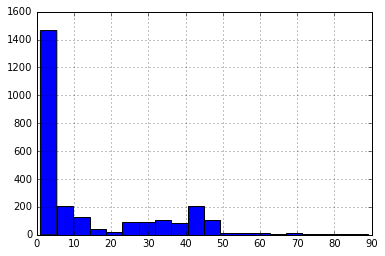

In [207]:
df[df['eff_new']>0]['eff_new'].hist(bins=20)

In [116]:
df2 = pd.DataFrame(complaints)
df2.columns = ["unique_key","agency","complaint","descriptor","created_date","closed_date","borough"]
df2['efficiency']=df2['closed_date']-df2['created_date']

In [125]:
df2.index=df2['efficiency']

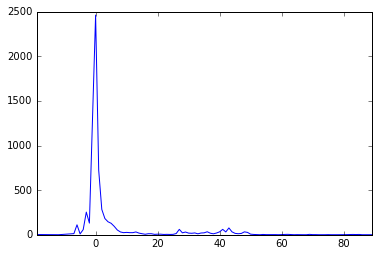

In [168]:
df2.groupby(by=df2.index.days)['unique_key'].count().plot()

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5851 entries, 0 to 5850
Data columns (total 8 columns):
unique_key      5851 non-null object
agency          5851 non-null object
complaint       5851 non-null object
descriptor      5851 non-null object
created_date    5851 non-null datetime64[ns]
closed_date     5650 non-null datetime64[ns]
borough         5851 non-null object
efficiency      5650 non-null timedelta64[ns]
dtypes: datetime64[ns](2), object(5), timedelta64[ns](1)
memory usage: 365.8+ KB


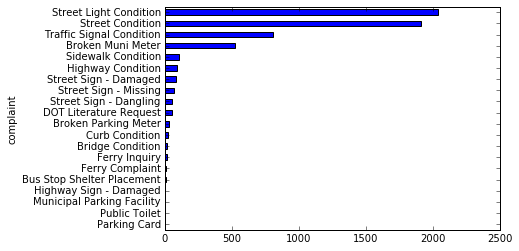

In [162]:
df.groupby(by='complaint').count()['unique_key'].sort_values().plot(kind="barh")

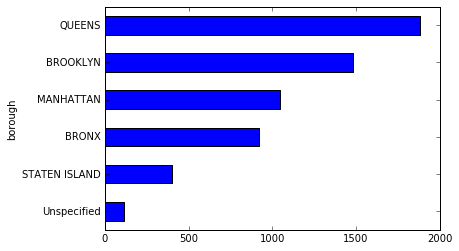

In [163]:
df.groupby(by='borough').count()['unique_key'].sort_values().plot(kind="barh")

In [210]:
new_df = df[df['eff_new']>0]
new_df['eff_new'].describe()

count    2607.000000
mean       14.333333
std        18.007218
min         1.000000
25%         1.000000
50%         4.000000
75%        28.000000
max        89.000000
Name: eff_new, dtype: float64

In [211]:
new_df['eff_new'].median()

4.0

In [213]:
new_df['eff_new'].mode()

0    1.0
dtype: float64

In [212]:
# UAL
28+27*1.5

68.5

In [216]:
# outlier
new_df[new_df['eff_new']>68.5].count()

unique_key      33
agency          33
complaint       33
descriptor      33
created_date    33
closed_date     33
borough         33
efficiency      33
eff_new         33
dtype: int64

## Conclusion
* In terms of borough, Queens has the most complaints, the second and the third is Brooklyn and Manhattan.
* Street light condition and stree condition is the most common reason for a complaint, much more than other reasons.
* If we don't consider the "null" data and bad data, the average time of close time is 14 days, with the min of same day closing and max of 89 days. Median closing day equals to 4. “Middle” 50% of data is in range of same day to 28 days. the standard deviation is 18, which seems to be high. There are 33 outliers.